In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [3]:
#df=pd.read_csv("../data/keri_churn_data_tidy.csv", nrows=40)
df=pd.read_csv("../data/keri_churn_data_tidy.csv")

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
csr_year_varchar,3655071.0,2.013243e+03,2.620681,2009.0,2011.00,2013.00,2015.00,2.018000e+03
csr_month_varchar,3655071.0,6.420375e+00,3.461385,1.0,3.00,6.00,9.00,1.200000e+01
idcampaign_master_varchar,3655071.0,1.043370e+06,660059.412509,368.0,479146.00,923253.00,1564917.00,2.522502e+06
idcampaign_varchar,3655071.0,1.382582e+06,647006.019480,61028.0,823001.00,1361565.00,1949512.00,2.523052e+06
idadvertiser_varchar,3655071.0,1.126115e+05,52940.063264,14.0,73747.00,114191.00,159027.00,2.344880e+05
idbusinesscategory_varchar,3655071.0,1.714201e+01,8.406552,1.0,10.00,21.00,23.00,3.200000e+01
idbusinesssubcategory_varchar,3655071.0,1.739670e+03,841.700930,0.0,1005.00,2110.00,2301.00,3.301000e+03
idoffer_varchar,3655071.0,3.063330e+02,589.379658,1.0,1.00,1.00,2.00,2.029000e+03
stop_request_varchar,3089977.0,1.379848e-02,0.116654,0.0,0.00,0.00,0.00,1.000000e+00
campaign_budget_varchar,3655071.0,1.259926e+03,2355.481195,0.0,500.00,888.00,1500.00,3.500000e+05


In [11]:
df.csr_year_varchar.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2009])

In [4]:
df.sort_values(by=['csr_year_varchar'], inplace=True)

In [5]:
df.tail(10)

,csr_year_varchar,csr_month_varchar,idcampaign_master_varchar,idcampaign_varchar,idadvertiser_varchar,advertiser_name_varchar,advertiser_city_varchar,advertiser_state_varchar,advertiser_zipcode_varchar,idbusinesscategory_varchar,...,clicks_varchar,impressions_varchar,calls_varchar,qualified_calls_varchar,emails_varchar,cvt_varchar,qualified_web_events_varchar,businessuser_varchar,system_varchar,advtrans_varchar
1035538,2018,1,2385239,2431465,180609,Progressive Health and Rehab,Gahanna,OH,43230.0,23.0,...,137.0,81085.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1035539,2018,2,2385239,2431465,180609,Progressive Health and Rehab,Gahanna,OH,43230.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1035540,2018,2,2385239,2453123,180609,Progressive Health and Rehab,Gahanna,OH,43230.0,23.0,...,110.0,70432.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0
1035541,2018,3,2385239,2453123,180609,Progressive Health and Rehab,Gahanna,OH,43230.0,23.0,...,12.0,7530.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1035542,2018,3,2385239,2475872,180609,Progressive Health and Rehab,Gahanna,OH,43230.0,23.0,...,118.0,70436.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1035543,2018,4,2385239,2475872,180609,Progressive Health and Rehab,Gahanna,OH,43230.0,23.0,...,7.0,5075.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1035544,2018,4,2385239,2499145,180609,Progressive Health and Rehab,Gahanna,OH,43230.0,23.0,...,2.0,1937.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1035549,2018,1,2385240,2409151,199313,Fatemeh Hadjian D D S,Palm Desert,CA,92260.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
733538,2018,3,2265735,2475396,193229,Native Stem Cell,Bloomfield Hills,MI,48302.0,20.0,...,261.0,6877.0,13.0,8.0,0.0,4.0,4.0,3.0,105.0,0.0
1788445,2018,4,1200533,2487088,36319,"MSE, Inc.",Los Angeles,CA,91104.0,22.0,...,607.0,12303.0,26.0,14.0,2.0,6.0,6.0,NaN,NaN,0.0


In [5]:
df['time_stamp']=df.csr_year_varchar*100+df.csr_month_varchar

In [6]:
df.csr_month_varchar.isna().sum()

0

In [7]:
df.columns

Index(['csr_year_varchar', 'csr_month_varchar', 'idcampaign_master_varchar',
       'idcampaign_varchar', 'idadvertiser_varchar', 'advertiser_name_varchar',
       'advertiser_city_varchar', 'advertiser_state_varchar',
       'advertiser_zipcode_varchar', 'idbusinesscategory_varchar',
       'business_category_varchar', 'idbusinesssubcategory_varchar',
       'business_subcategory_varchar', 'idoffer_varchar', 'product_varchar',
       'stop_request_varchar', 'adv_change_type_varchar',
       'campaign_budget_varchar', 'spend_varchar', 'clicks_varchar',
       'impressions_varchar', 'calls_varchar', 'qualified_calls_varchar',
       'emails_varchar', 'cvt_varchar', 'qualified_web_events_varchar',
       'businessuser_varchar', 'system_varchar', 'advtrans_varchar',
       'time_stamp'],
      dtype='object')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

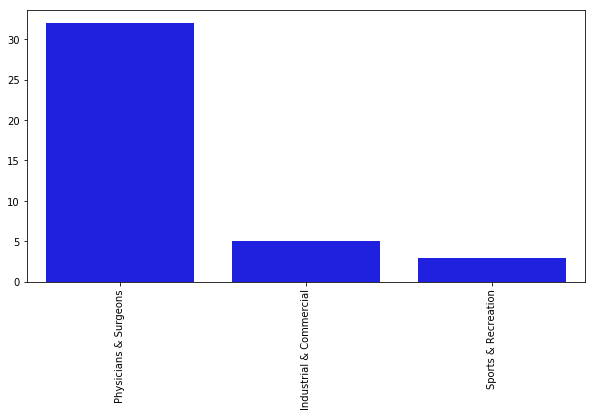

In [8]:
temp=df.business_category_varchar.value_counts()

plt.figure(figsize=(10,5))
sns.barplot(temp.index, temp.values, color='b')
plt.xticks(rotation=90)

# IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [9]:
ids=df.idadvertiser_varchar.unique()
num_col=['campaign_budget_varchar', 'spend_varchar', 'clicks_varchar',
       'impressions_varchar', 'calls_varchar', 'qualified_calls_varchar',
       'emails_varchar', 'cvt_varchar', 'qualified_web_events_varchar',
       'advtrans_varchar']


In [10]:
def time_plot(temp, col_names, address):
    for col in col_names:
        plt.figure(figsize=(8,5))
        plt.cla()
        plt.plot(np.arange(0,temp.time_stamp.shape[0]), temp[col], LineWidth=4.0);
        plt.xlabel('Months', fontsize=18)
    #plt.yticks(rotation=45)
        plt.tick_params(direction='in', length=10, width=5, colors='k',
                   grid_color='k', grid_alpha=1, labelsize=20)
        ax = plt.gca()
        tag=temp.advertiser_name_varchar.iloc[0]+"-statrting: "+ \
        str(temp.csr_month_varchar.iloc[0])+"-"+str(temp.csr_year_varchar.iloc[0])
        plt.text(0.01,0.9, tag, transform=ax.transAxes, fontsize=15)
        ax.get_xaxis().get_major_formatter().set_useOffset(False)
        
        
        save_to=address+"/"+col+".png"
        plt.savefig(save_to)
        plt.close()

In [11]:
#def get_adv_plots( my_tuple=(ids, data_frame) ):
def get_adv_plots( my_tuple=(list, pd.DataFrame) ):
    ad_id=my_tuple[0]
    df=my_tuple[1]
    for ad_id in ids:
        temp=df[df.idadvertiser_varchar == ad_id].sort_values(by=['time_stamp'])
        address ='./advertisers/case_id_'+str(ad_id)
        print(address)
        os.makedirs(address, exist_ok=True)
        time_plot(temp, num_col, address) 

In [15]:
num_process=2
#df.shape
my_mod=np.floor_divide(df.shape[0],num_process)

indecies=[]
for i in range(0,num_process-1):
    indecies.append( (i*my_mod, (i+1)*my_mod) )

   
indecies

[(0, 20)]

In [18]:
from multiprocessing import Pool

# with Pool(num_process) as p:
#     p.map(get_adv_plots, [(ids, df.iloc[indecies[0][0]:indecies[0][1],:]), 
#                           (ids, df.iloc[indecies[1][0]:indecies[1][1],:]), 
#                           (ids, df.iloc[indecies[2][0]:indecies[2][1],:]),
#                           (ids, df.iloc[indecies[2][1]:,:])])

with Pool(num_process) as p:
     p.map(get_adv_plots, [(ids, df.iloc[0:20,:]), 
                           (ids, df.iloc[20:,:])] )

./advertisers/case_id_84481
./advertisers/case_id_84481
./advertisers/case_id_84545
./advertisers/case_id_84546


IndexError: single positional indexer is out-of-bounds

In [45]:
import concurrent.futures
import math

with concurrent.futures.ProcessPoolExecutor(max_workers=2) as executor:
    executor.map(get_adv_plots, [(ids, df.iloc[0:20,:]),(ids, df.iloc[20:,:])] ) 

./advertisers/case_id_84481
./advertisers/case_id_84481
./advertisers/case_id_84545
./advertisers/case_id_84546


In [40]:
ids

array([84481, 84545, 84546])

In [44]:
a